In [130]:
%reset
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import esn_module
import importlib
importlib.reload(esn_module)
esn = esn_module.esn

from echo_state_tests import gen_in_out_one_in_subs

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [131]:
ESN = esn(eps_LMS_gain=0.01,eps_LMS_out=0.0,bias=np.random.normal(0.,0.01,(1000)))

In [132]:
in_xor, out_xor = gen_in_out_one_in_subs(100000,5)
in_xor_test, out_xor_test = gen_in_out_one_in_subs(5000,5)

In [141]:
ESN.gain *= 0.01
ESN.eps_LMS_gain=0.01
ESN.eps_LMS_out=0.
gain,w_out = ESN.learn_w_out_gains_online_LMS(in_xor,out_xor,return_gain=True,return_w_out=True,subsample_rec=10)
#ESN.learn_w_out(in_xor,out_xor)

100%|██████████| 99999/99999 [00:22<00:00, 4507.08it/s]


In [137]:
ESN.eps_LMS_gain=0.
ESN.eps_LMS_out=0.001
gain,w_out = ESN.learn_w_out_gains_online_LMS(in_xor,out_xor,return_gain=True,return_w_out=True,subsample_rec=10)

100%|██████████| 99999/99999 [00:22<00:00, 4495.68it/s]


In [142]:
out_xor_pred = ESN.predict_data(in_xor_test)

100%|██████████| 4999/4999 [00:00<00:00, 6935.82it/s]


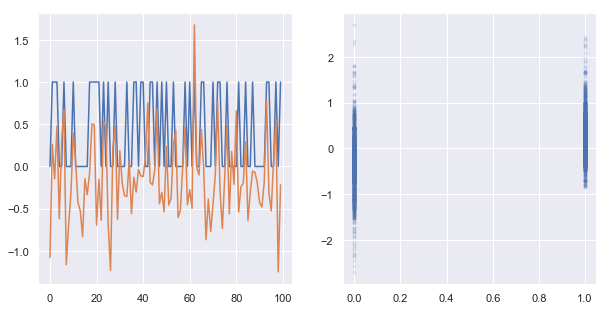

In [143]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(out_xor_test[-100:])
ax[0].plot(out_xor_pred[-100:])

ax[1].plot(out_xor_test,out_xor_pred,'.',alpha=0.1)
plt.show()

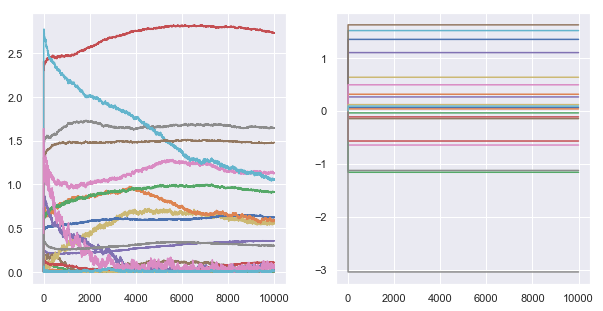

In [144]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(gain[:,:20])
ax[1].plot(w_out[:,0,:20])

plt.show()